Dataset loaded successfully!
Shape of data: (250, 9)

Columns: ['Sample_ID', 'Year', 'Crop_Type', 'Yield_t_ha', 'Residue_to_Product_Ratio', 'Residue_Quantity_t', 'Moisture_%', 'Calorific_Value_MJ_kg', 'Predicted_Energy_MJ']

Data Splitting Done!
Training samples: 200
Testing samples: 50

Model Evaluation Results:
Mean Absolute Error (MAE): 9905.22 MJ
Root Mean Square Error (RMSE): 19784.54 MJ
R² Score: 0.9638


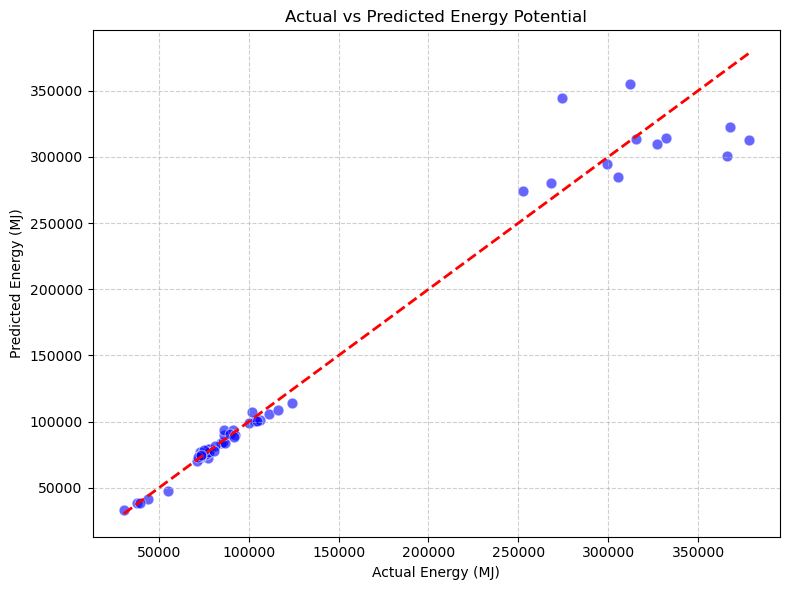


----------------- SUMMARY -----------------
✅ Data split completed (80% train / 20% test)
✅ Random Forest model trained successfully
✅ Predictions generated and compared with actual values
✅ Model Accuracy (R²): 96.38 %
-------------------------------------------


In [1]:

# Week 2 Task: Model Training, Prediction & Accuracy Analysis


# 1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib


# 2. Load the cleaned dataset

data = pd.read_csv("Cleaned_Bioenergy_Dataset_.csv")

print("Dataset loaded successfully!")
print("Shape of data:", data.shape)
print("\nColumns:", data.columns.tolist())


# 3. Define input features and target variable

features = ['Yield_t_ha', 'Residue_to_Product_Ratio', 'Residue_Quantity_t',
            'Moisture_%', 'Calorific_Value_MJ_kg']
target = 'Predicted_Energy_MJ'

# Convert categorical feature Crop_Type to dummy variables
data = pd.get_dummies(data, columns=['Crop_Type'], drop_first=True)

# Define feature matrix X and target vector y
X = data[features + [col for col in data.columns if 'Crop_Type_' in col]]
y = data[target]


# 4. Split dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nData Splitting Done!")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")


# 5. Model Selection and Training

model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)




# 6. Prediction on Test Data

y_pred = model.predict(X_test)


# 7. Model Evaluation

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Results:")
print(f"Mean Absolute Error (MAE): {mae:.2f} MJ")
print(f"Root Mean Square Error (RMSE): {rmse:.2f} MJ")
print(f"R² Score: {r2:.4f}")


# 8. Save the trained model

joblib.dump(model, "bioenergy_randomforest_model.pkl")



# 9.Visualization: Actual vs Predicted Scatter Plot

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6, s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Energy (MJ)")
plt.ylabel("Predicted Energy (MJ)")
plt.title("Actual vs Predicted Energy Potential")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("actual_vs_predicted.png", dpi=300)
plt.show()


# 10. Summary Report

print("\n----------------- SUMMARY -----------------")
print("✅ Data split completed (80% train / 20% test)")
print("✅ Random Forest model trained successfully")
print("✅ Predictions generated and compared with actual values")
print("✅ Model Accuracy (R²):", round(r2 * 100, 2), "%")
print("-------------------------------------------")
